<a href="https://colab.research.google.com/github/ayushwattal/CaliforniaHousing-DeepMLP/blob/main/CaliforniaHousing_DeepMLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install keras-tuner

In [ ]:
# Importing Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from torch.optim import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import InputLayer
from keras.layers import Flatten
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras_tuner.tuners import RandomSearch
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

In [ ]:
# Load California Housing Rent
cal_housing = fetch_california_housing()

# Creating Dataframe with data and target column
df_cal_housing = pd.DataFrame(data= cal_housing.data, columns=cal_housing.feature_names)
df_cal_housing['Target'] = pd.Series(cal_housing.target)

df_cal_housing

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
# Function Coulmns
X = pd.DataFrame(data= cal_housing.data, columns=cal_housing.feature_names)

# Target Coulmn
y = pd.DataFrame(cal_housing.target,columns=['Target'] )

In [ ]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
y

,Target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print(f' Shape of X_train : {X_train.shape}')
print(f' Shape of y_train : {y_train.shape}')
print(f' Shape of X_test : {X_test.shape}')
print(f' Shape of y_test : {y_test.shape}')

 Shape of X_train : (14448, 8)
 Shape of y_train : (14448, 1)
 Shape of X_test : (6192, 8)
 Shape of y_test : (6192, 1)


In [ ]:
# Scaling Training and Testing Dataset

scaler = RobustScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = cal_housing.feature_names)
X_test = pd.DataFrame(scaler.transform(X_test), columns = cal_housing.feature_names)

In [ ]:
print(f' Type of X_train : {type(X_train)}')
print(f' Shape of X_train : {X_train.shape}')

print(f' Type of X_train : {type(X_test)}')
print(f' Shape of X_test : {X_test.shape}')


 Type of X_train : <class 'pandas.core.frame.DataFrame'>
 Shape of X_train : (14448, 8)
 Type of X_train : <class 'pandas.core.frame.DataFrame'>
 Shape of X_test : (6192, 8)


In [ ]:
X_train 

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.270260,0.315789,0.403242,-0.791086,0.053419,0.198110,-0.089947,0.129288
1,-0.308556,-0.473684,-0.515716,0.289924,-0.180556,-0.946132,-0.391534,0.374670
2,0.302850,-0.263158,0.238944,-0.641601,-0.466880,-0.297182,0.084656,-0.430079
3,-0.196134,-0.789474,0.395308,0.477963,-0.925214,-0.740780,1.320106,-0.656992
4,-0.106032,1.210526,-0.267544,0.179305,0.382479,-0.611430,0.925926,-1.039578
...,...,...,...,...,...,...,...,...
14443,1.292147,0.315789,0.556291,-1.317283,-0.544872,0.253443,-0.129630,0.145119
14444,-0.223247,0.210526,1.015146,2.351772,0.625000,1.280799,-0.066138,0.284960
14445,-0.276012,0.368421,-0.772883,0.322887,0.628205,0.606679,-0.063492,0.034301
14446,0.995093,-0.736842,0.721524,0.197622,0.650641,0.426205,0.875661,-0.910290


In [ ]:
X_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,-0.848027,-0.210526,-0.645394,-0.290855,0.239316,1.249230,0.473545,-0.131926
1,-0.460004,0.052632,-0.119769,1.539384,0.424145,-0.161828,0.230159,-0.250660
2,-0.026930,1.210526,-0.778816,1.457971,0.151709,-1.716414,0.933862,-1.036939
3,1.003492,-0.631579,0.577761,-0.313113,0.573718,0.739080,0.002646,-0.055409
4,0.084853,0.263158,0.161667,-0.229352,-0.112179,-0.392931,0.621693,-0.902375
...,...,...,...,...,...,...,...,...
6187,-0.266837,0.947368,-0.643140,-0.306364,-0.627137,-0.466935,0.817460,-0.894459
6188,-0.935710,0.631579,-0.422252,0.737899,-0.185897,1.018356,-0.042328,0.313984
6189,-0.012370,-0.684211,-0.912128,0.279250,4.108974,-0.527339,-0.158730,0.158311
6190,0.050620,-1.000000,0.167313,0.116292,5.092949,0.860522,0.939153,-0.730871


In [ ]:
# Correlation among target variable and columns

corr = df_cal_housing.corr(method='pearson')
corr

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


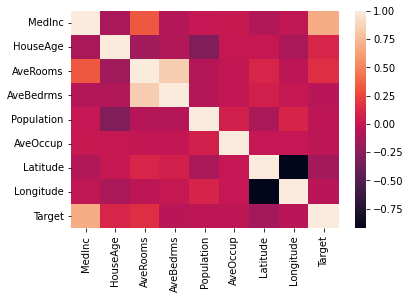

In [ ]:
# Heatmap of Correlation
sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels=corr.columns.values)


In [ ]:
X_train.shape

(14448, 8)

In [ ]:
X_test.shape

(6192, 8)

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

# Hyper Tuning Model

In [ ]:

# Method for HyperParameter Tuning
def build_model(hp):
    model = keras.Sequential()
    model.add(Flatten())
    for i in range(hp.Int('num_layers',2,20)):
      model.add(Dense(
          # Tune number of units.
          units=hp.Int('units_'+ str(i), min_value=30, max_value=600, step=30),
          # Tune the activation function to use.
          activation=hp.Choice("activation", ["relu", "tanh", "selu"]),
        )
    )
    # Tune whether to use dropout.
    if hp.Boolean("dropout"):
        model.add(Dropout(rate=0.25))
    model.add(Dense(1, activation="linear"))
    # Define the optimizer learning rate as a hyperparameter.
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='mean_absolute_error',
        metrics=['mean_absolute_error'],
    )
    return model




In [ ]:
# Early Stopping
earlyStopping = EarlyStopping(monitor='val_mean_absolute_error', mode='min', verbose=1, min_delta=1, patience=200)

# Model Checkpoint 
modelCheckpoint = ModelCheckpoint('savedModel.h5', monitor='val_mean_absolute_error', mode='min', verbose=1, save_best_only=True)


In [ ]:
tuner = RandomSearch(build_model,
                     objective = 'val_mean_absolute_error',
                     max_trials=5,
                     executions_per_trial = 3,
                     directory =' D255/HW#2',
                     project_name ='California Housing')

INFO:tensorflow:Reloading Oracle from existing project  D255/HW#2/California Housing/oracle.json
INFO:tensorflow:Reloading Tuner from  D255/HW#2/California Housing/tuner0.json


In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 24
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 30, 'max_value': 600, 'step': 30, 'sampling': None}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh', 'selu'], 'ordered': False}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 30, 'max_value': 600, 'step': 30, 'sampling': None}
dropout (Boolean)
{'default': False, 'conditions': []}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 30, 'max_value': 600, 'step': 30, 'sampling': None}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 30, 'max_value': 600, 'step': 30, 'sampling': None}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 30, 'max_value': 600, 

In [ ]:
# Searching for Best Hyperparamter
tuner.search(X_train, y_train, validation_split = 0.3, epochs=30, verbose=0, callbacks=[earlyStopping, modelCheckpoint])

INFO:tensorflow:Oracle triggered exit


In [ ]:
# Get the top 2 hyperparameters.
best_hps = tuner.get_best_hyperparameters(2)

# Build the model with the best hp.
model = build_model(best_hps[0])


In [ ]:
history = model.fit(X_train, y_train, validation_split = 0.3, epochs=30)

Epoch 1/30
317/317 [==============================] - 7s 18ms/step - loss: 0.6597 - mean_absolute_error: 0.6597 - val_loss: 0.4825 - val_mean_absolute_error: 0.4825
Epoch 2/30
317/317 [==============================] - 5s 17ms/step - loss: 0.4646 - mean_absolute_error: 0.4646 - val_loss: 0.4588 - val_mean_absolute_error: 0.4588
Epoch 3/30
317/317 [==============================] - 5s 15ms/step - loss: 0.4462 - mean_absolute_error: 0.4462 - val_loss: 0.4793 - val_mean_absolute_error: 0.4793
Epoch 4/30
317/317 [==============================] - 5s 17ms/step - loss: 0.4339 - mean_absolute_error: 0.4339 - val_loss: 0.4240 - val_mean_absolute_error: 0.4240
Epoch 5/30
317/317 [==============================] - 6s 18ms/step - loss: 0.4207 - mean_absolute_error: 0.4207 - val_loss: 0.4778 - val_mean_absolute_error: 0.4778
Epoch 6/30
317/317 [==============================] - 5s 17ms/step - loss: 0.4087 - mean_absolute_error: 0.4087 - val_loss: 0.4509 - val_mean_absolute_error: 0.4509
Epoch 7/30

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 540)               4860      
                                                                 
 dense_4 (Dense)             (None, 510)               275910    
                                                                 
 dense_5 (Dense)             (None, 540)               275940    
                                                                 
 dense_6 (Dense)             (None, 1)                 541       
                                                                 
Total params: 557,251
Trainable params: 557,251
Non-trainable params: 0
_________________________________________________________________


In [ ]:
_, train_mae = model.evaluate(X_train, y_train, verbose=0)
_, test_mae = model.evaluate(X_test, y_test, verbose=0)
print('Mean Abolute Loss for Train Set : %.3f, Mean Abolute Loss for Test Set : %.3f' % (train_mae, test_mae))

Mean Abolute Loss for Train Set : 0.334, Mean Abolute Loss for Test Set : 0.360


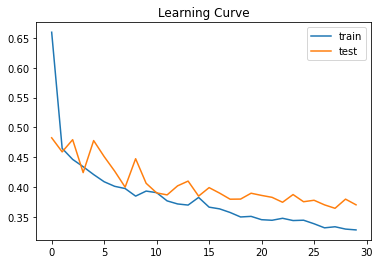

In [ ]:
# plot training history
plt.plot(history.history['mean_absolute_error'], label='train')
plt.plot(history.history['val_mean_absolute_error'], label='test')
plt.legend()
plt.title('Learning Curve')
plt.show()

References : 


*   https://github.com/ageron/handson-ml2/blob/master/10_neural_nets_with_keras.ipynb
*   https://keras.io/guides/keras_tuner/getting_started/


